<a href="https://colab.research.google.com/github/snair09/sta141c/blob/main/STA141c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project : What's the cause of a Hazardous Asteroid Hazardous?




### By Group 8: Aria H, Sandeep N, Elyse M, and Jaehyeon P

In [ ]:
# import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotnine import *
import seaborn as sns
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import RidgeCV
from cycler import cycler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from scipy.linalg import cholesky, cho_solve, cho_factor
method = SMOTE(k_neighbors = 3)
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.linalg import cholesky, cho_solve, cho_factor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.linalg import lu_factor, lu_solve

In [ ]:
# run this code for your local directory 
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
#Sandeep path
nasa = pd.read_csv('/content/drive/MyDrive/data.csv')
nasa_copy_2 = nasa

please add any packages if we need

In [ ]:
#Jay's path
#nasa = pd.read_csv('nasa.csv')
#nasa.info()

**Variable: Hazardous**

In [ ]:
#`hazardous`:True
true =nasa[nasa['Hazardous']==True]
##`hazardous`:False 
false =nasa[nasa['Hazardous']==False]
print("# of Hazardous(Value = True):", true.shape[0])
print("# of Hazardous(Value = False):", false.shape[0])

# we need to change categorical variable to numerical variable
# Saved computational speed by using apply instead of a for loop
nasa['Hazardous_NV'] = nasa['Hazardous'].apply(lambda x: 1 if x == True else 0) 

# of Hazardous(Value = True): 755
# of Hazardous(Value = False): 3932


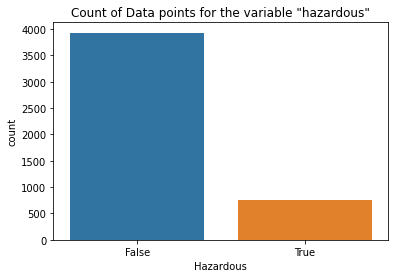

In [ ]:
#Use histogram to show how the dataset is imbalanced
sns.countplot(data = nasa, x = 'Hazardous')
plt.title('Count of Data points for the variable "hazardous"')
plt.show()

## **Oversampling when the dataset is imbalanced** 
As the histogram showed, the dataset about ‘hazardous’ and ‘non-hazardous’ is considerably imbalanced. The amount of the ‘hazardous’ data is 755, and the ‘non-hazardous’ data is 3932. In other words, around 83.89% of the dataset is ‘non-hazardous,’ and only 16.11% is ‘hazardous.’ It means that even if we make a model which predicts all the variables as ’not hazardous,’ we could get 83.89% accuracy. It is not easy to depend on accuracy to evaluate a machine learning classifier trained on this dataset. Therefore, resampling the dataset is
needed, and oversampling is one way to edit this dataset.

In [ ]:
#A copy of the nasa dataframe
new_nasa = nasa.copy()

**Dropping the variables #1**

We can drop the variables which do not have any distinctive information

*Orbiting Body* : Only one value 'Earth' \\
*Hazardous* : Hazardous_NV is used instead of Hazaradous. \\
*Equinox* : Only one value 'J2000' \\
*Name, Neo Reference ID* : They are the names of the variables which does not affect to hazardous. \\
We are going to use KM unit. So the variables Est Dia in M(min), Est Dia in M(max), Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(max),Est Dia in Feet(min),Miss Dist.(Astronomical),Miss Dist.(lunar), Miss Dist.(miles), Relative Velocity km per sec, Miles per hour are dropped.

In [ ]:
# dropping the variables
new_nasa = new_nasa.drop(['Name', 'Neo Reference ID','Est Dia in M(max)', 'Est Dia in M(min)', 'Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(max)','Est Dia in Feet(min)','Miss Dist.(Astronomical)',
        'Miss Dist.(lunar)', 'Miss Dist.(miles)', 'Relative Velocity km per sec','Miles per hour', 'Equinox', 'Hazardous', 'Orbiting Body'] , axis = 1)
new_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(min)           4687 non-null   float64
 2   Est Dia in KM(max)           4687 non-null   float64
 3   Close Approach Date          4687 non-null   object 
 4   Epoch Date Close Approach    4687 non-null   float64
 5   Relative Velocity km per hr  4687 non-null   float64
 6   Miss Dist.(kilometers)       4687 non-null   float64
 7   Orbit ID                     4687 non-null   int64  
 8   Orbit Determination Date     4687 non-null   object 
 9   Orbit Uncertainity           4687 non-null   int64  
 10  Minimum Orbit Intersection   4687 non-null   float64
 11  Jupiter Tisserand Invariant  4687 non-null   float64
 12  Epoch Osculation             4687 non-null   float64
 13  Eccentricity      

**Checking the distribution of variables**

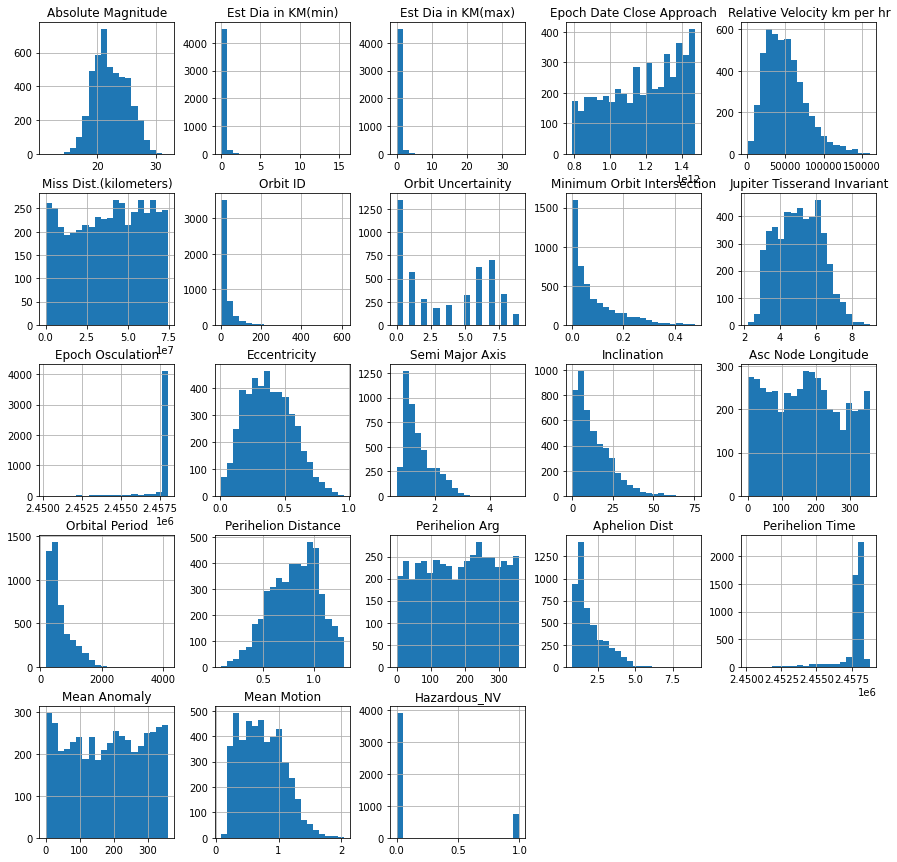

In [ ]:
new_nasa.hist(bins=20, figsize=(15,15));

we can see the many of variables do not have normal distribution. \\
Using correlation matrix, we need to check the collinearity.

Text(0.5, 1.0, 'Correlation Matrix')

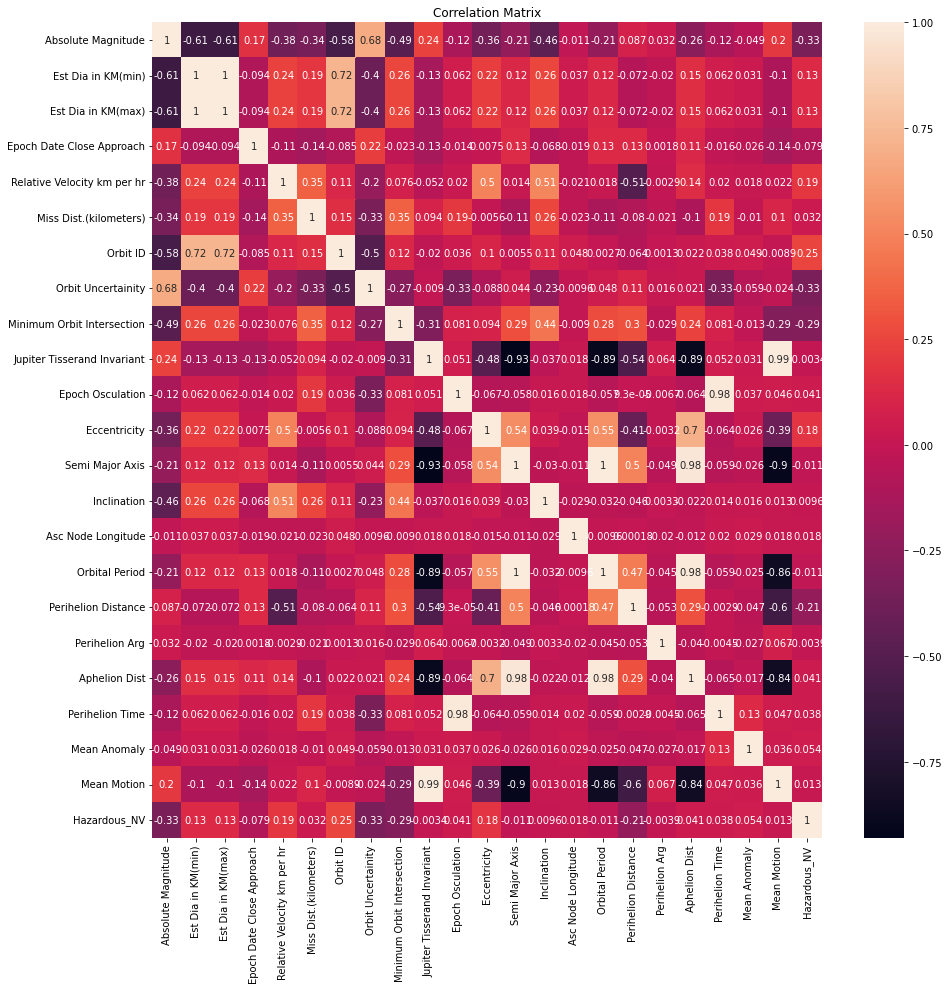

In [ ]:
## Heatmap of Correlations
plt.figure(figsize = (15,15))
sns.heatmap(new_nasa.corr(),annot = True)
plt.title("Correlation Matrix")

**High correlated variables**

- Perihelion Time and Epoch Osculation \\
- Absolute Magnitude, Orbit ID, Orbit Uncertainty, Est Dia in KM(min), Est Dia in KM(min) \\
- Apehelion Dist and Semi Major Axis, Orbital Period, Apehelion Dist, Mean Motion, Jupiter Tisserand Invariant, Perihelion Distance

**Dropping the variables #2**

we need to check Variance Inflation Factor if it is over 10. 
If it is over 10, then it means we could not use those variables because it has high multicollinearity value.

In [ ]:
# source : https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

features = ['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Orbit ID','Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Hazardous_NV', 'Relative Velocity km per hr',
       'Miss Dist.(kilometers)']


def vif_value(cf):
    """
    - Input is a list of variable names that are correalted
    - Returns VIF values of the variables that have been given as input
    """
    
    X = add_constant(new_nasa[cf])
    df = pd.DataFrame([variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])],
        index=X.columns).reset_index()
    df.columns = ['variable', 'VIF']
    new_df = df[df['variable'].isin(cf)].sort_values('VIF', ascending=False)
    return new_df

In [ ]:
vif = vif_value(features)
vif

,variable,VIF
10,Semi Major Axis,inf
3,Est Dia in KM(max),inf
16,Aphelion Dist,inf
14,Perihelion Distance,inf
2,Est Dia in KM(min),inf
7,Jupiter Tisserand Invariant,1282.576481
13,Orbital Period,1039.371292
19,Mean Motion,796.411893
17,Perihelion Time,27.696253
8,Epoch Osculation,27.516546


we are going to do this process removing the largest VIF until the largest VIF is less than 10.

In [ ]:
drop = []

In [ ]:
remove = list(vif['variable'])[0]
drop.append(remove)
features.remove(remove)
vif = vif_value(features)
vif

,variable,VIF
3,Est Dia in KM(max),inf
2,Est Dia in KM(min),inf
15,Aphelion Dist,1553.740857
7,Jupiter Tisserand Invariant,1282.576481
12,Orbital Period,1039.371292
18,Mean Motion,796.411893
13,Perihelion Distance,59.539317
16,Perihelion Time,27.696253
8,Epoch Osculation,27.516546
9,Eccentricity,19.039145


In [ ]:
remove = list(vif['variable'])[0]
drop.append(remove)
features.remove(remove)
vif = vif_value(features)
vif

,variable,VIF
14,Aphelion Dist,1553.740857
6,Jupiter Tisserand Invariant,1282.576481
11,Orbital Period,1039.371292
17,Mean Motion,796.411893
12,Perihelion Distance,59.539317
15,Perihelion Time,27.696253
7,Epoch Osculation,27.516546
8,Eccentricity,19.039145
9,Inclination,5.316031
1,Absolute Magnitude,4.834677


In [ ]:
remove = list(vif['variable'])[0]
drop.append(remove)
features.remove(remove)
vif = vif_value(features)
vif

,variable,VIF
6,Jupiter Tisserand Invariant,720.324909
16,Mean Motion,578.205741
14,Perihelion Time,27.690919
7,Epoch Osculation,27.509866
11,Orbital Period,18.262216
12,Perihelion Distance,16.955384
8,Eccentricity,15.155184
1,Absolute Magnitude,4.779744
9,Inclination,3.772857
18,Relative Velocity km per hr,3.396089


In [ ]:
remove = list(vif['variable'])[0]
drop.append(remove)
features.remove(remove)
vif = vif_value(features)
vif

,variable,VIF
13,Perihelion Time,27.671689
6,Epoch Osculation,27.481324
11,Perihelion Distance,16.624771
7,Eccentricity,13.619643
10,Orbital Period,8.805145
15,Mean Motion,8.066254
1,Absolute Magnitude,4.744705
17,Relative Velocity km per hr,3.197363
5,Minimum Orbit Intersection,2.754395
3,Orbit ID,2.747777


In [ ]:
remove = list(vif['variable'])[0]
drop.append(remove)
features.remove(remove)
vif = vif_value(features)
vif


,variable,VIF
11,Perihelion Distance,16.624631
7,Eccentricity,13.619609
10,Orbital Period,8.802389
14,Mean Motion,8.065224
1,Absolute Magnitude,4.744188
16,Relative Velocity km per hr,3.197051
5,Minimum Orbit Intersection,2.754166
3,Orbit ID,2.747692
2,Est Dia in KM(min),2.603923
4,Orbit Uncertainity,2.504953


In [ ]:
remove = list(vif['variable'])[0]
drop.append(remove)
features.remove(remove)
vif = vif_value(features)
vif

,variable,VIF
10,Orbital Period,5.186616
1,Absolute Magnitude,4.744143
13,Mean Motion,4.057247
7,Eccentricity,2.935059
15,Relative Velocity km per hr,2.882509
3,Orbit ID,2.722022
2,Est Dia in KM(min),2.589699
5,Minimum Orbit Intersection,2.587552
4,Orbit Uncertainity,2.490373
8,Inclination,2.359751


now the biggest value of VIF is less than 10. 

In [ ]:
drop

['Semi Major Axis',
 'Est Dia in KM(max)',
 'Aphelion Dist',
 'Jupiter Tisserand Invariant',
 'Perihelion Time',
 'Perihelion Distance']

we need to drop the variables above

In [ ]:
# with high vif values
with_vif = new_nasa.copy()
# drop the date variables
with_vif = with_vif.drop(['Close Approach Date','Epoch Date Close Approach','Orbit Determination Date'], axis = 1)

# without high vif values
without_vif = new_nasa.copy()
without_vif = without_vif.drop(drop, axis = 1)
# drop the date variables
without_vif = without_vif.drop(['Close Approach Date','Epoch Date Close Approach','Orbit Determination Date'], axis = 1)

In [ ]:
# check the new dataset
without_vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(min)           4687 non-null   float64
 2   Relative Velocity km per hr  4687 non-null   float64
 3   Miss Dist.(kilometers)       4687 non-null   float64
 4   Orbit ID                     4687 non-null   int64  
 5   Orbit Uncertainity           4687 non-null   int64  
 6   Minimum Orbit Intersection   4687 non-null   float64
 7   Epoch Osculation             4687 non-null   float64
 8   Eccentricity                 4687 non-null   float64
 9   Inclination                  4687 non-null   float64
 10  Asc Node Longitude           4687 non-null   float64
 11  Orbital Period               4687 non-null   float64
 12  Perihelion Arg               4687 non-null   float64
 13  Mean Anomaly      

Text(0.5, 1.0, 'New Correlation Matrix')

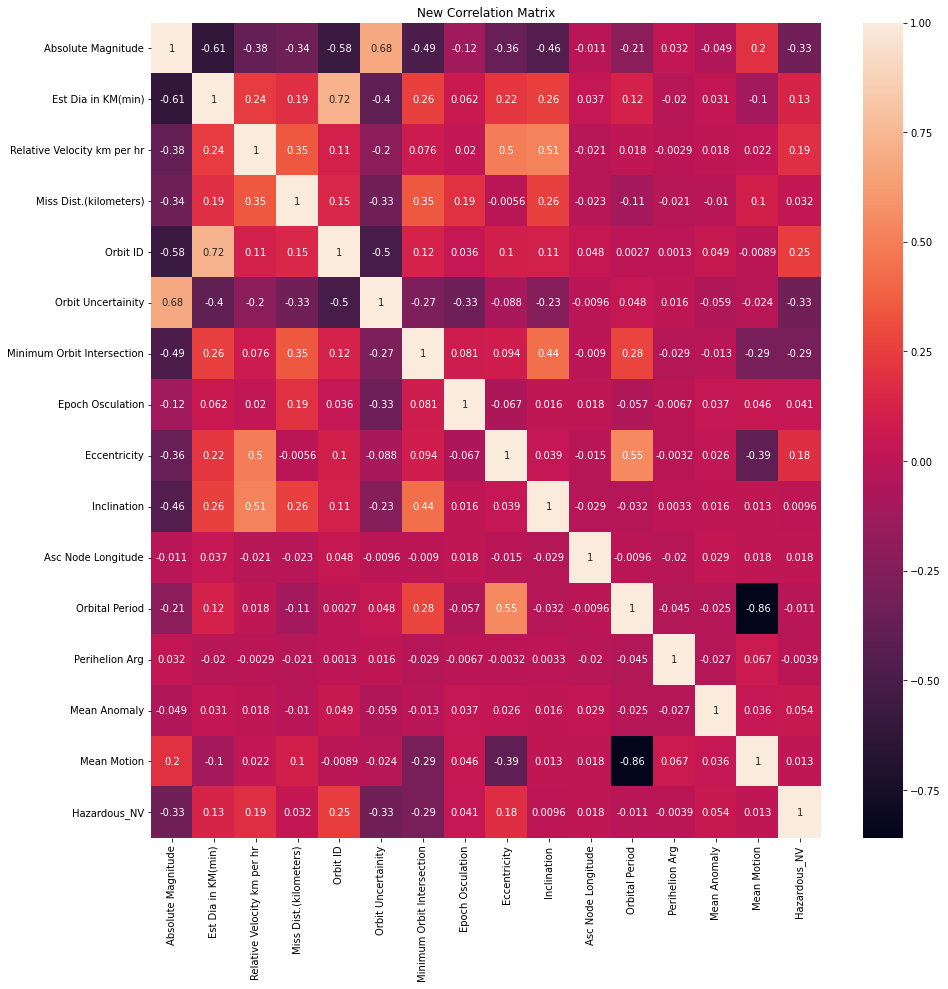

In [ ]:
## New Heatmap of Correlations
plt.figure(figsize = (15,15))
sns.heatmap(without_vif.corr(),annot = True)
plt.title("New Correlation Matrix")

There is still some high multicollinearity values, so we need to remove them using ridge regression. 

**Train Test Split**

In [ ]:
### X and Y for before VIF:
X_wvif = with_vif.loc[:, ~with_vif.columns.isin(['Hazardous_NV'])]
Y_wvif = with_vif['Hazardous_NV'] 

### X and Y for after VIF:
X_wovif = without_vif.loc[:, ~without_vif.columns.isin(['Hazardous_NV'])]
Y_wovif = without_vif['Hazardous_NV'] 

**Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE
method = SMOTE(k_neighbors = 3)

X_resampled, y_resampled = method.fit_resample(X_wovif,Y_wovif)

y_resampled_df = y_resampled.to_frame()
y_resampled_df.head()

,Hazardous_NV
0,1
1,0
2,1
3,0
4,1


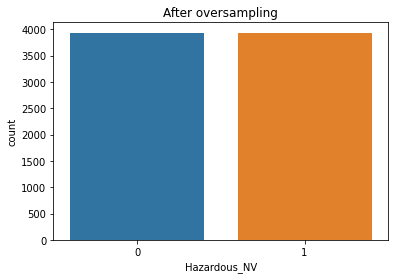

In [ ]:
sns.countplot(data = y_resampled_df, x='Hazardous_NV')
plt.title("After oversampling")
plt.show()

we can check the dataset is not imblanced now

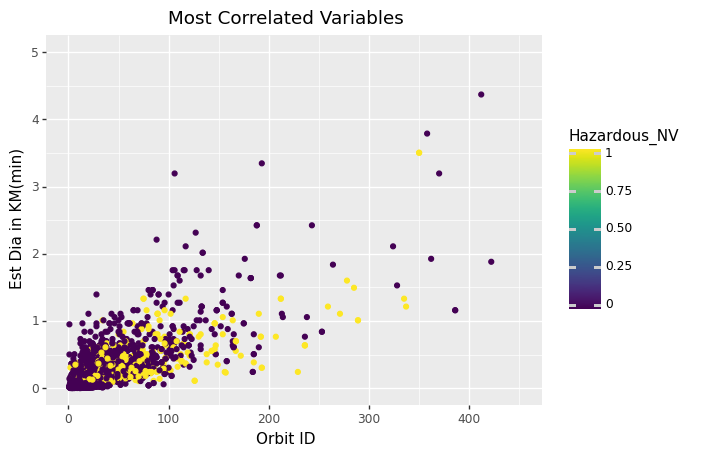

<ggplot: (8794566259749)>

In [ ]:
# take the most correlated variables from the matrix
# limit the axes to remove an outlier
(
    ggplot(without_vif, aes(x="Orbit ID", y="Est Dia in KM(min)")) + geom_point(aes(color="Hazardous_NV"))
    + labs(title="Most Correlated Variables") + xlim(0, 450) + ylim(0, 5)
)

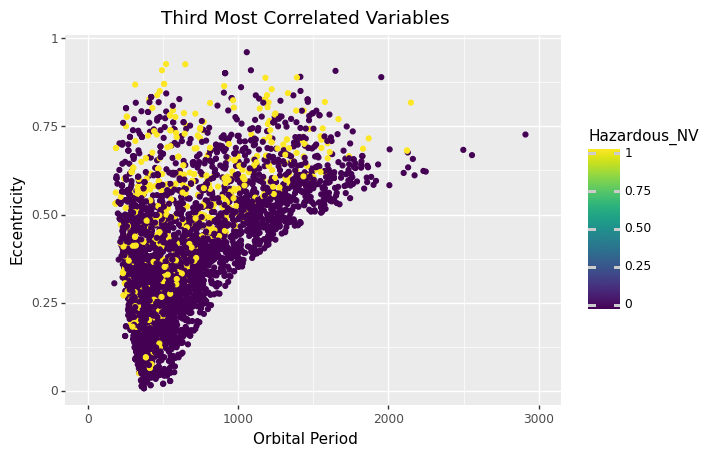

<ggplot: (8794566283585)>

In [ ]:
# take third most correlated variables from correlation matrix
(
    ggplot(without_vif, aes(x="Orbital Period", y="Eccentricity")) + geom_point(aes(color="Hazardous_NV"))
    + labs(title="Third Most Correlated Variables") + xlim(0, 3000)
)

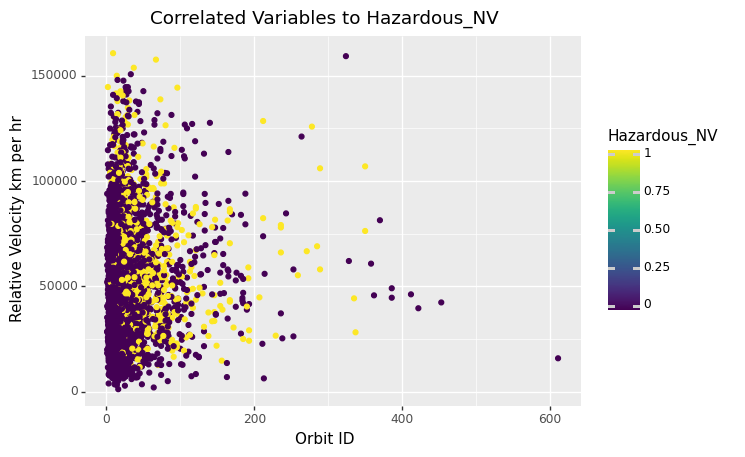

<ggplot: (8794566123753)>

In [ ]:
# take variables that are most correlated with Hazardous_NV
(
    ggplot(without_vif, aes(x="Orbit ID", y="Relative Velocity km per hr")) + geom_point(aes(color="Hazardous_NV"))
    + labs(title="Correlated Variables to Hazardous_NV")
)

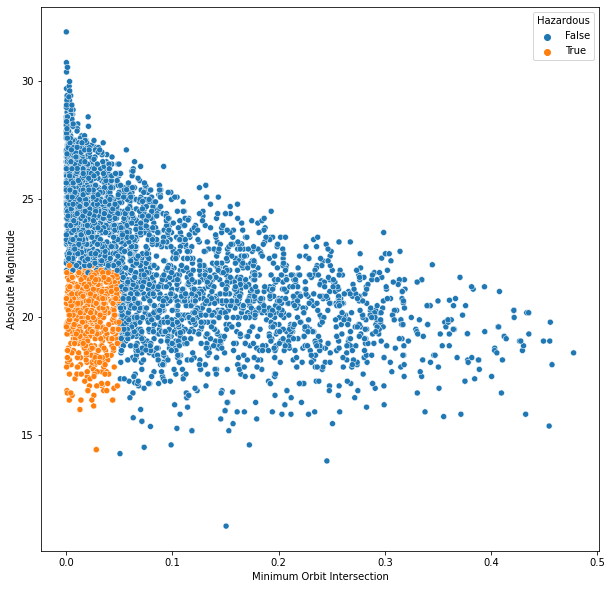

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(data=nasa, x='Minimum Orbit Intersection', y='Absolute Magnitude', hue='Hazardous')
plt.show()


From the four plots we have created above, we can see that there is no pattern for what is considered hazardous even between the two most correlated variables. This means that we will have to do more advanced tests to see what variable has the most weight in deciding if an asteroid is hazardous or not.

**Train Test Split with oversampling dataset**

In [ ]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_resampled, y_resampled, random_state=0)

**Feature Selection without VIF or oversampling**

In [ ]:
label_encoder = LabelEncoder()
nasa_copy_2["Label"] = label_encoder.fit_transform(nasa_copy_2["Hazardous"]) 
nasa_copy_2.drop(["Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)","Relative Velocity km per sec","Est Dia in M(max)","Relative Velocity km per hr","Est Dia in Feet(max)", 
                  "Est Dia in Feet(min)", "Est Dia in Miles(max)", "Est Dia in Miles(min)","Est Dia in KM(max)","Est Dia in KM(min)","Neo Reference ID",
                  "Orbit ID","Name","Close Approach Date","Equinox","Epoch Date Close Approach","Orbiting Body","Orbit Determination Date","Hazardous"], axis=1, inplace=True)

In [ ]:
X = nasa_copy_2.iloc[:, :-2]
y = nasa_copy_2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=183)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Ridge Regression**

In [ ]:
# Solving for betas given different lambda values so we can plot ridge trace graph.

#using Mulitprocessing to speed up computation.

import multiprocessing as mp
import time
tic = time.time()
lambdas = np.arange(0.1,50,0.1)
X_t = X.transpose()
def solve_ridge(i): # solve using cholesy 
  c,low = cho_factor(X_t @ X+ i*np.identity(19))
  betas = cho_solve((c,low),X_t@y)
  return betas
# mp.pool a and map functions
pool = mp.Pool(processes=4)
beta_matrix_pool = pool.map(solve_ridge, lambdas)
beta_matrix_np = pd.DataFrame(beta_matrix, columns=list(X.columns))
toc = time.time()
print("multiprocessing time:", toc-tic)

multiprocessing time: 1.5953269004821777


In [ ]:
# ridge trace graph without mp. For loops is slower.
tic = time.time()
beta_all = pd.DataFrame()
X_t = X.transpose()
for i in np.arange(0.1,50,0.1):
  c,low = cho_factor(X_t @ X+i*np.identity(19))
  beta = cho_solve((c,low), X_t @ y)
  beta_all[str(i)]= beta
toc = time.time()

print("Time with a for loop:", toc-tic)

Time with a for loop: 3.2079341411590576


Multiprocessing is significantly faster than using a for loop. The difference will be bigger if we increase the number of iterations.

In [ ]:
# simulation study for ridge regression.
from numpy import random

random.seed(1)
x1 = random.normal(50,9,100)
x2 = random.normal(200,64,100)
error = random.normal(0,16,100)

#b0 = 50, b1 = -7, b2 = 12
y1 = 50 - (7*x1) + (12*x2) +error

Xs_t = [[1]*100, x1, x2]
Xs_t= np.array(Xs_t)
Xs = Xs_t.transpose()
i= 0.1
c,low = cho_factor(Xs_t @ Xs +i*np.identity(3))
beta_sim = cho_solve((c,low), Xs_t @ y1)
print(beta_sim)

[42.15487245 -7.07777335 12.05668443]


We can see the coeffiencts are approximately equal to their true values.

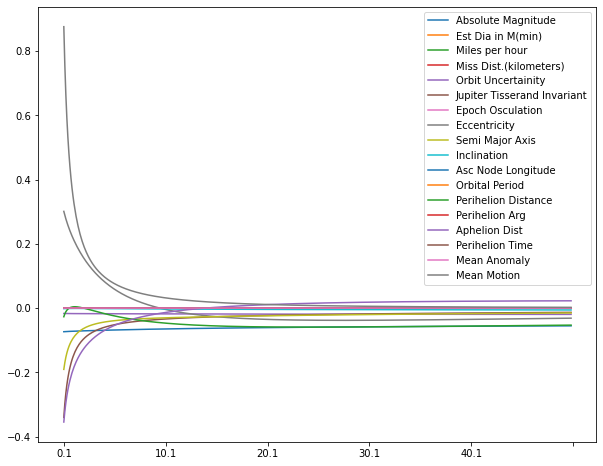

In [ ]:
beta_all_T = beta_all.transpose()
MOI = beta_all_T[5]
beta_all_T = beta_all_T.set_axis(list(X.columns),axis=1,inplace=0)
del beta_all_T['Minimum Orbit Intersection']
#beta_all_T = beta_all_T.set_axis(list(X.columns[:-1]),axis=1,inplace=0)
#beta_all_T.head()
beta_all_T.plot.line(figsize = (10,8))
plt.show()

In [ ]:


def fit(X,y,alpha,type): # fits train data
    X = np.c_[np.ones((X.shape[0],1)),X]# adding intercept
    X_t = X.transpose()
    iden = np.identity(X.shape[1])
    iden[0,0] = 0 #the intercept should not be influenced by bias
    alpha_matrix = alpha*iden
    if type =="C":
      c,low = cho_factor(X_t @ X + alpha_matrix)
      beta = cho_solve((c,low), X_t @ y)
    if type =="L":
      lu, piv= lu_factor(X_t @ X + alpha_matrix)
      beta = lu_solve((lu,piv),X_t @ y)
    if type == "Q":
      Q,R = scipy.linalg.qr(X_t @ X + alpha_matrix)
      Qt = np.transpose(Q)
      beta = scipy.linalg.solve_triangular(R, Qt@X_t @ y)
    return beta

def predict(X, betas): #predicts using test data
    X_pred = np.c_[np.ones((X.shape[0], 1)), X]
    predicted = X_pred.dot(betas)
    return predicted



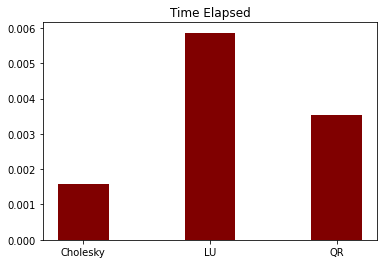

In [ ]:
# comparison of decompostion methods
from scipy.linalg.decomp_lu import lu
tic = time.time()
ridge_betas = fit(X_train,y_train,20,"C")
toc =time.time()
Chol_time = toc-tic
#
tic = time.time()
ridge_betas = fit(X_train,y_train,20,"L")
toc =time.time()
LU_time = toc-tic
#
tic = time.time()
ridge_betas = fit(X_train,y_train,20,"Q")
toc =time.time()
QR_time = toc-tic

times = [Chol_time,LU_time, QR_time]
x_lab = ['Cholesky','LU', 'QR']
plt.bar(x_lab, times, color = 'maroon', width =0.4)
plt.title("Time Elapsed")
plt.show()

In [ ]:
predictions = predict(X_test,ridge_betas)

In [ ]:
categorical_predictions = [0]*len(predictions)
# Set a decision boundry
for i in range(len(predictions)):
    if predictions[i]>=0.4: # Setting 0.4 to decision boundry
        categorical_predictions[i] = 1

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,categorical_predictions)
conf_matrix

array([[1115,   86],
       [  36,  170]])

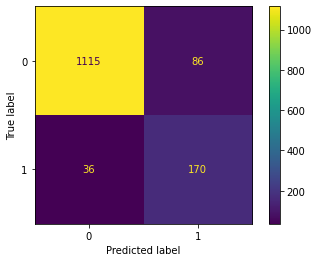

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, categorical_predictions)
plt.show()

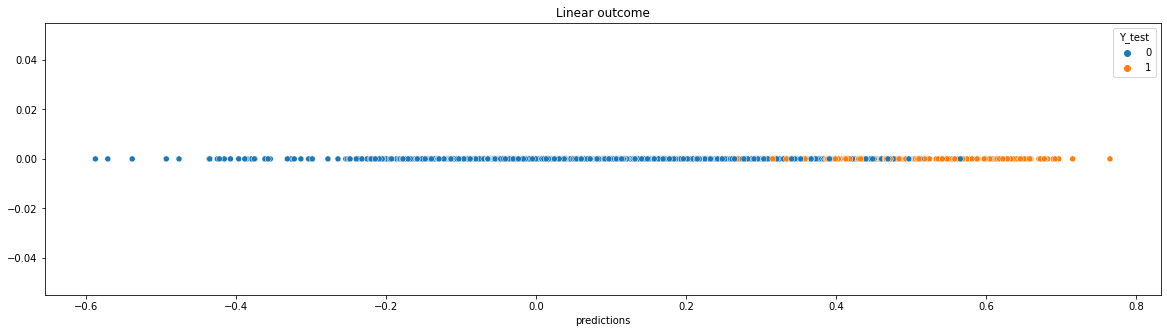

In [ ]:
line_plot_df ={'predictions':predictions, 'Y_test':y_test}
plt.figure(figsize=(20,5))
sns.scatterplot(data=line_plot_df, x='predictions',y= [0]*len(predictions), hue='Y_test')
plt.title('Linear outcome')
plt.show()

In [ ]:
pd.DataFrame(classification_report(y_test, categorical_predictions, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.968723,0.664062,0.913291,0.816393,0.924117
recall,0.928393,0.825243,0.913291,0.876818,0.913291
f1-score,0.948129,0.735931,0.913291,0.842030,0.917061
support,1201.000000,206.000000,0.913291,1407.000000,1407.000000


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_os,y_train_os)

#With oversampling dataset
clf = XGBClassifier(verbosity = 0)
clf.fit(np.array(X_train_os),np.array(y_train_os))
y_pred_os_lr = clf.predict(np.array(X_test_os))
#Classification report
pd.DataFrame(classification_report(y_test_os, y_pred_os_lr, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.996954,0.997961,0.997457,0.997458,0.997457
recall,0.997967,0.996945,0.997457,0.997456,0.997457
f1-score,0.997461,0.997453,0.997457,0.997457,0.997457
support,984.000000,982.000000,0.997457,1966.000000,1966.000000


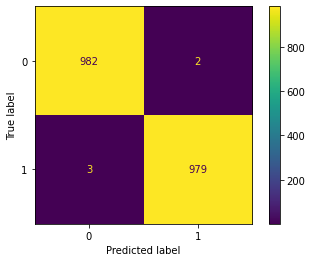

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_os, y_pred_os_lr)

## Implementation Logistic Regression with Gradient Descent

In [ ]:
## Using sigmoid function
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
## Log Loss function with using Y-hat
def loss(y, yhat):
    loss = -np.mean(y * (np.log(yhat)) - (1 - y) * np.log(1 - yhat))
    return loss

In [ ]:
## Using function to return differentiated w and b
def gradients(x_train, y_train, yhat):
    m = x_train.shape[0]
    pd_w = (1/m) * np.dot(x_train.T, (yhat - y_train))
    pd_b = (1/m) * np.sum((yhat - y_train))
    return pd_w, pd_b

In [ ]:
## Normalizing the x training values
def normalize(x_train):
    m, n = x_train.shape
    for i in range(n):
        x_train = (x_train - x_train.mean(axis=0))/x_train.std(axis=0)
    return x_train

In [ ]:
## using train function to return w, b and loss
def train(X, y, batch_size, epochs, learning_rate):
    bias = 0
    m, n = X.shape
    weights = np.zeros((n,1))
    x = normalize(X)
    y = y.reshape(m,1)
    ## Storing the loss
    losses = []
    for epoch in range(epochs):
        
        for i in range((m - 1)//batch_size + 1):
            start_i = i * batch_size
            end_i = start_i + batch_size
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            yhat = sigmoid(np.dot(xb, weights) + bias)
            # The gradients of loss
            dw, db = gradients(xb, yb, yhat)
            bias -= learning_rate * db
            weights -= learning_rate * dw
        # Calculating loss
        l = loss(y, sigmoid(np.dot(X, weights) + bias))
        losses.append(l)  
    return weights, bias, losses

In [ ]:
## Preparing the fuction to use it for Oversampling X test
def predict(X):
    
    X = normalize(X)
    pred = sigmoid(np.dot(X, weights) + bias)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in pred]
    
    return np.array(pred_class)

In [ ]:
## Updating the oversample y training and test
y_train_os = y_train_os.to_numpy()
y_test_os = y_test_os.to_numpy()

**Decision Tree**

In [ ]:
#With Oversampling dataset
DT = DecisionTreeClassifier().fit(X_train_os,y_train_os)
y_pred_os = pd.Series(DT.predict(X_test_os))
#Classification report
pd.DataFrame(classification_report(y_test_os, y_pred_os, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.995947,0.998979,0.997457,0.997463,0.997461
recall,0.998984,0.995927,0.997457,0.997455,0.997457
f1-score,0.997463,0.997450,0.997457,0.997457,0.997457
support,984.000000,982.000000,0.997457,1966.000000,1966.000000


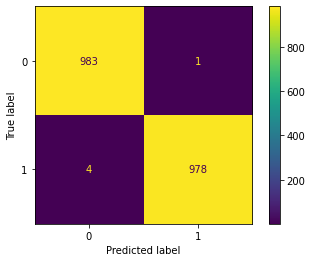

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_os, y_pred_os)
plt.show()

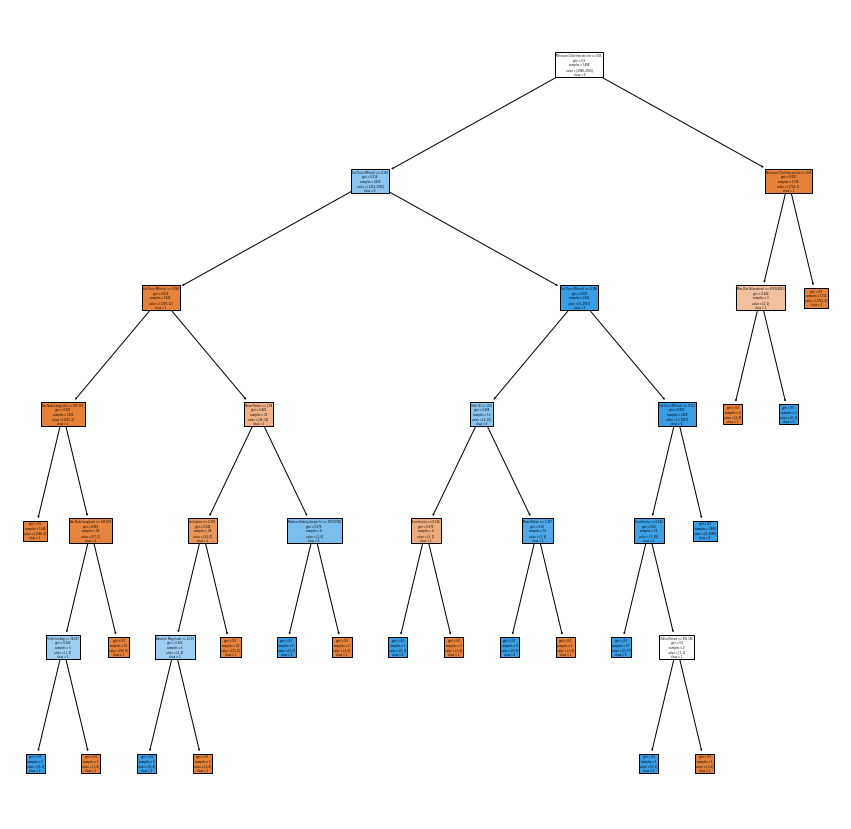

In [ ]:
#Decision tree plot of oversampling datset
Y = Y_wovif
DT_plot = plt.figure(figsize=(15,15))

y_list = []
for i in Y.tolist():
    y_list.append(str(i))
_ = tree.plot_tree(DT, 
                   feature_names=X_wovif.columns.tolist(),  
                   class_names=y_list,
                   filled=True)

**Random Forest with oversampling dataset**

> Indented block



In [ ]:
#With Oversampling dataset
RFC = RandomForestClassifier(max_depth=2, random_state=0)
y_pred_os = RFC.fit(X_train_os, y_train_os).predict(X_test_os)
#Classification report
pd.DataFrame(classification_report(y_test_os, y_pred_os, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.988922,0.997945,0.993388,0.993433,0.993429
recall,0.997967,0.988798,0.993388,0.993383,0.993388
f1-score,0.993424,0.993350,0.993388,0.993387,0.993387
support,984.000000,982.000000,0.993388,1966.000000,1966.000000


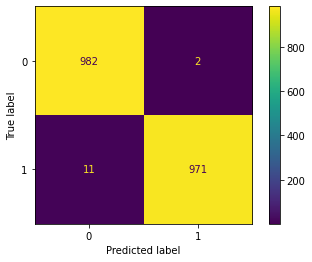

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_os, y_pred_os)
plt.show()

**XGboost with oversampling dataset**

In [ ]:
#With oversampling dataset
clf = XGBClassifier(verbosity = 0)
clf.fit(np.array(X_train_os),np.array(y_train_os))
y_pred_os = clf.predict(np.array(X_test_os))
#Classification report
pd.DataFrame(classification_report(y_test_os, y_pred_os, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.996954,0.997961,0.997457,0.997458,0.997457
recall,0.997967,0.996945,0.997457,0.997456,0.997457
f1-score,0.997461,0.997453,0.997457,0.997457,0.997457
support,984.000000,982.000000,0.997457,1966.000000,1966.000000


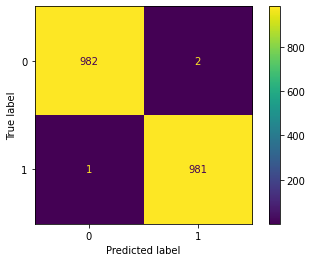

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_os, y_pred_os)
plt.show()

**KNN with oversampling dataset**

In [ ]:
def KNN(X_train,y_train,X_test,k):
    """
    For each test example, find K nearest training examples to it and find the most common
    class among these K_nearest training examples. Repeat the process.
    """
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    m,n = X_train.shape
    mt,nt = X_test.shape
    y_pred = np.zeros(mt)
    distance = np.zeros(m)
    neighbor = np.zeros(k)
    for i in range(mt):
        x = X_test[i]
        for j in range(m):
            d = np.sqrt(np.sum(np.square(x - X_train[j])))
            distance[j] = d
        index = np.argsort(distance)
        y_train_sorted = y_train[index]
        neighbor = y_train_sorted[:k]
        y_pred[i] = mode(neighbor)[0][0]
    return y_pred

In [ ]:
#With Oversampling dataset
y_pred_os = KNN(X_train_os,y_train_os,X_test_os, 7)
#Classification report when k = 7
pd.DataFrame(classification_report(y_test_os, y_pred_os, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.752009,0.699543,0.722787,0.725776,0.725803
recall,0.665650,0.780041,0.722787,0.722846,0.722787
f1-score,0.706199,0.737602,0.722787,0.721901,0.721885
support,984.000000,982.000000,0.722787,1966.000000,1966.000000


In [ ]:
#With Oversampling dataset
y_pred_os = KNN(X_train_os,y_train_os,X_test_os, 8)
#Classification report when k = 8
pd.DataFrame(classification_report(y_test_os, y_pred_os, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.717897,0.719550,0.718718,0.718723,0.718722
recall,0.721545,0.715886,0.718718,0.718715,0.718718
f1-score,0.719716,0.717713,0.718718,0.718715,0.718716
support,984.000000,982.000000,0.718718,1966.000000,1966.000000


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_os, y_pred_os)

In [ ]:
#With Oversampling dataset
y_pred_os = KNN(X_train_os,y_train_os,X_test_os, 9)
#Classification report when k = 9
pd.DataFrame(classification_report(y_test_os, y_pred_os, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.738676,0.685068,0.708545,0.711872,0.711899
recall,0.646341,0.770876,0.708545,0.708609,0.708545
f1-score,0.689431,0.725443,0.708545,0.707437,0.707419
support,984.000000,982.000000,0.708545,1966.000000,1966.000000


In [ ]:
#With Oversampling dataset
y_pred_os = KNN(X_train_os,y_train_os,X_test_os, 10)
#Classification report when k = 10
pd.DataFrame(classification_report(y_test_os, y_pred_os, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.711438,0.697927,0.704476,0.704682,0.704689
recall,0.689024,0.719959,0.704476,0.704492,0.704476
f1-score,0.700052,0.708772,0.704476,0.704412,0.704407
support,984.000000,982.000000,0.704476,1966.000000,1966.000000


,0,1,accuracy,macro avg,weighted avg
precision,0.998983,0.997965,0.998474,0.998474,0.998475
recall,0.997967,0.998982,0.998474,0.998475,0.998474
f1-score,0.998475,0.998473,0.998474,0.998474,0.998474
support,984.000000,982.000000,0.998474,1966.000000,1966.000000


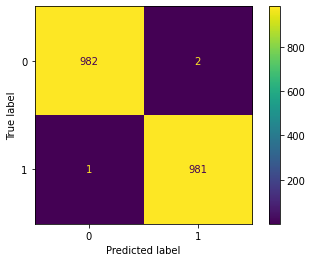

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_os, y_pred_os_lr)